# Get Data 

`geo_data1.txt` has the following columns from `dataset_information.xlxs`: 
* Dataset_id
* Class_id
* Class_name
* Sample_id
* Cancer_type
* Cancer_subtype
* Metastasis_status
* Primary_site
* Metastasis_site
* Sample_label

We are going to use GEOparse to read in all miRNA data (there should only be two columns each, one for the REF, which is the mirna isoform, and then the RMA log normalized value. Some data might have 2 columns but not RMA; those we will discard.)



Ref: https://hcmdb.i-sanger.com/ 


In [1]:
import GEOparse
import matplotlib.pyplot as plt
import pandas 

In [2]:
import csv
with open("geo_data1.txt") as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

In [5]:
# ## Use this section to play with the GEOparser and interact with GEO objects 

# gse1 = GEOparse.get_GEO(geo="GSM452579", destdir="./data")
# gse2 = GEOparse.get_GEO(geo="GSM452578", destdir="./data")
# gse1.metadata # gets info about the sample (but doesn't help with distinguishing mRNA, lncRNA, and miRNA...)
# gse1.table # the actual data 
# gse1.columns # columns. miRNA should have 2, and the label is "RMA" log normalized data
# # Use this to get ID_REF as the row names so we can concat the dataframes together 
# lol1=gse1.table.set_index('ID_REF')
# lol2=gse2.table.set_index('ID_REF')
# data=pandas.concat([lol1, lol2],axis=1)

14-Nov-2019 17:12:12 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM452579&form=text&view=full to ./data/GSM452579.txt
14-Nov-2019 17:12:13 DEBUG downloader - Total size: 0
14-Nov-2019 17:12:13 DEBUG downloader - md5: None
1.24MB [00:00, 11.6MB/s]
14-Nov-2019 17:12:13 DEBUG downloader - Moving /tmp/tmpAaGVBj to /home/jiaqiwu/ml4sp_metastasis/data/GSM452579.txt
14-Nov-2019 17:12:13 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM452579&form=text&view=full
14-Nov-2019 17:12:13 INFO GEOparse - Parsing ./data/GSM452579.txt: 


## Download all GEO microRNA data and save as data frame

#### Labels
* 0: Dataset_id
* 1: Class_id
* 2: Class_name
* 3: Sample_id
* 4: Cancer_type
* 5: Cancer_subtype
* 6: Metastasis_status
* 7: Primary_site
* 8: Metastasis_site
* 9: Sample_label

`d[0][9]` would give you the first row (labels), and ninth column. 
`d[0]` would give you the column names (labels)

In [ ]:
# This part actually reads the data in.

mirna = []
labels = []
cols = []

# others=[]
# other_labels=[]
for i in range(5401, len(d)):
    gsm=d[i][3]
    if i % 10 == 0:
        print(i, gsm)
    gse = GEOparse.get_GEO(geo=gsm, destdir="./data/")
    
    # Make sure it is miRNA data. This means there are only two columns, and the ID_REF 
    # should be HSA_something...ETC. There will be 54675 miRNA sites.
    # You can check cols to make sure the sites/values (HSA_/RMA normalized) match up! 
    if len(gse.columns)==2 and len(gse.table) == 54675:
        label = [d[i][0], d[i][1], d[i][2],d[i][3],d[i][4],d[i][5],d[i][6],d[i][7],d[i][8],d[i][9]]
        temp = gse.table.set_index('ID_REF')
        temp.columns=[gsm]
        mirna.append(temp)
        labels.append(label)
        cols.append(gse.columns)
        

In [4]:
# Create 1 big dataframe for the mirna data 
# axis=1 means we stack COLUMNS side by side (default is stacking ROWS on top of e/o)
# write output to csv so we don't have to recompute each time 
data=pandas.concat(mirna, axis=1, sort=True)
data.to_csv("mirnas5400_end.txt", sep="\t")

In [6]:
# labels contain all info just in case we need it later 
df_labels = pandas.DataFrame(labels)
df_labels.to_csv("mirnas_labels_5400_end.txt", sep="\t")

In [163]:
data

,GSM452644,GSM452556,GSM452558,GSM452559,GSM452562,GSM452563,GSM452565,GSM452570,GSM452571,GSM452578,...,GSM459865,GSM459859,GSM459863,GSM459858,GSM459862,GSM459859,GSM459863,GSM459860,GSM459864,GSM459861
1007_s_at,10.595130,9.690262,9.961185,10.218258,10.400674,10.100725,10.176827,10.234913,10.424114,10.830209,...,10.560814,7.149277,9.926041,9.315427,9.780896,7.149277,9.926041,6.333248,6.254671,10.420306
1053_at,7.081157,7.259417,7.336989,7.172484,7.162852,7.356992,6.212843,6.847891,7.030258,6.938012,...,6.425839,6.119447,7.329594,5.686635,6.100553,6.119447,7.329594,5.922890,5.945420,7.103064
117_at,5.453222,5.105263,5.710500,6.687467,5.598294,5.550863,5.474923,5.803256,5.263520,5.361380,...,7.775821,5.607437,4.931296,5.107268,5.019410,5.607437,4.931296,5.731343,5.467917,8.693682
121_at,8.875872,7.996323,7.614496,8.033316,8.400472,8.184161,7.714280,8.774394,7.933254,8.115603,...,6.819130,6.888821,6.910226,7.371978,7.238486,6.888821,6.910226,6.890604,6.961278,7.467844
1255_g_at,3.716420,3.229717,3.084148,3.387284,3.396437,3.347232,3.173831,3.473914,3.473792,3.202686,...,2.884802,2.927875,2.678632,2.789937,3.035615,2.927875,2.678632,3.015024,2.952978,3.000924
1294_at,8.062402,6.620822,7.418679,7.509504,6.567608,7.784210,7.960214,6.810973,8.120588,6.586929,...,6.717825,6.919157,6.480058,7.963483,7.662693,6.919157,6.480058,6.994890,6.405510,7.241086
1316_at,6.047013,5.575745,5.481945,6.457352,5.978391,5.851376,6.611660,6.192786,6.019839,6.480742,...,3.935088,3.768627,4.238325,4.546117,4.032035,3.768627,4.238325,3.704166,3.614029,3.641636
1320_at,4.769789,4.576562,4.377111,4.550204,4.557886,4.353780,4.195637,4.324924,4.240053,4.275577,...,3.850855,4.091989,4.274898,4.225705,4.154414,4.091989,4.274898,4.084392,4.206618,3.972421
1405_i_at,7.482288,5.956786,5.709078,5.148011,4.888958,5.479025,5.366430,5.253634,5.681764,4.726807,...,7.738727,8.500845,8.534953,9.715747,9.161763,8.500845,8.534953,8.688830,8.071675,7.733992
1431_at,3.650351,3.374032,3.678294,3.631546,4.118883,3.628330,3.727862,3.812399,3.623370,3.723776,...,9.680309,13.399284,3.265956,3.469476,3.186525,13.399284,3.265956,13.536394,13.456691,7.100194


In [165]:
pandas.DataFrame(labels)

,0,1,2,3,4,5,6,7,8,9
0,GSE18105,1,primary normal,GSM452644,colorectal cancer,NA,YES,colorectum,unknown,Primary Normal
1,GSE18105,2,primary tumor,GSM452556,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
2,GSE18105,2,primary tumor,GSM452558,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
3,GSE18105,2,primary tumor,GSM452559,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
4,GSE18105,2,primary tumor,GSM452562,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
5,GSE18105,2,primary tumor,GSM452563,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
6,GSE18105,2,primary tumor,GSM452565,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
7,GSE18105,2,primary tumor,GSM452570,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
8,GSE18105,2,primary tumor,GSM452571,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor
9,GSE18105,2,primary tumor,GSM452578,colorectal cancer,NA,YES,colorectum,unknown,Primary Tumor


## Combine the CSVs (had to download in 2 parts)

In [16]:
# index_col=0 takes the first column as row names 

data_1 = pandas.read_csv('mirnas1_5400.txt',sep='\t',index_col=0)
data_2 = pandas.read_csv('mirnas5400_end.txt',sep='\t',index_col=0)

labels_1 = pandas.read_csv('mirnas_labels_1_5400.txt',sep='\t',index_col=0)
labels_2 = pandas.read_csv('mirnas_labels_5400_end.txt',sep='\t',index_col=0)

In [23]:
all_labels = pandas.concat([labels_1, labels_2])
all_labels.columns=['dataset_id', 'class_id', 'class_name', 'sample_id', 'cancer_type', 'cancer_subtype', 'metastasis_status','primary_site', 'metastasis_site', 'sample_label']

In [25]:
all_data = pandas.concat([data_1, data_2], axis=1)

In [26]:
all_data.to_csv("mirnas_all.txt", sep="\t")

In [32]:
all_labels.to_csv("mirnas_labels_all.txt", sep="\t")

## Taking a look at the data

In [33]:
len(all_labels)

1698

In [39]:
all_labels.columns

Index([u'dataset_id', u'class_id', u'class_name', u'sample_id', u'cancer_type',
       u'cancer_subtype', u'metastasis_status', u'primary_site',
       u'metastasis_site', u'sample_label'],
      dtype='object')

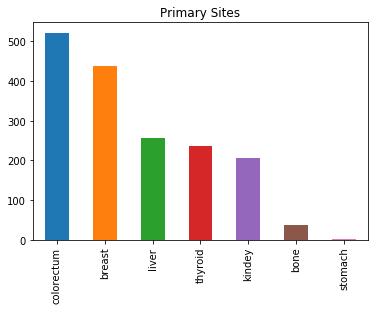

In [43]:
all_labels['primary_site'].value_counts().plot(kind='bar', title='Primary Sites')

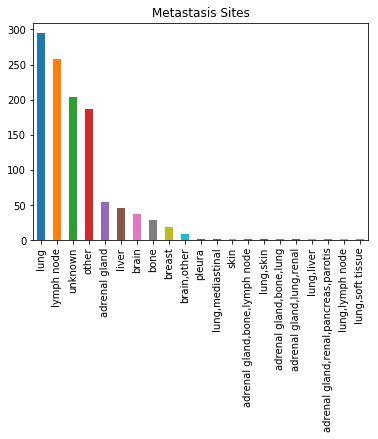

In [46]:
all_labels['metastasis_site'].value_counts().plot(kind='bar', title='Metastasis Sites')

#### This gave me a random idea;
Would it be useful to look at the differences between primary tumors that HAVE metastisized, vs. ones that haven't? Would there be differences...

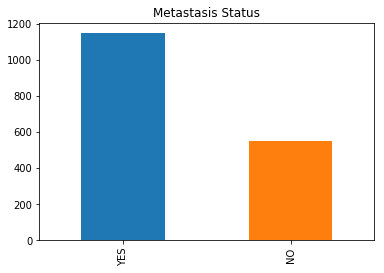

In [44]:
all_labels['metastasis_status'].value_counts().plot(kind='bar',title='Metastasis Status')